<a href="https://colab.research.google.com/github/otabek7/Adaline_Learning_Algorithm/blob/main/Mavlonov_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Reading the Iris data into a Pandas dataframe**

In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Plotting the Iris data**

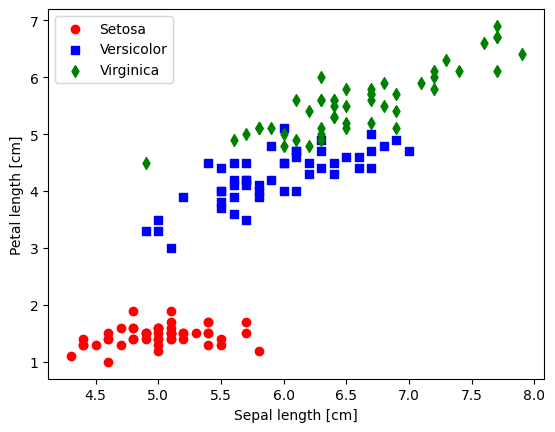

In [ ]:
import matplotlib.pyplot as plt

# select setosa, versicolor and virginica
ys = df.iloc[0:150, 4].values

# extract sepal length and petal length
Xs = df.iloc[0:150, [0, 2]].values

# plot data
plt.scatter(Xs[:50, 0], Xs[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(Xs[50:100, 0], Xs[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(Xs[100:150, 0], Xs[100:150, 1],
            color='green', marker='d', label='Virginica')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
#plt.axis('equal')

plt.show()

**Implementing the perceptron learning algorithm**

In [ ]:
import numpy as np

# The percetropn class

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    n_iter : int
      Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, n_iter=50):
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self.w_ = [np.float_(0.)] * X.shape[1]
        self.b_ = np.float_(0.)
        self.updates_ = []
        self.errors_ = []

        for _ in range(self.n_iter):
            updates = 0
            for xi, target in zip(X, y):
                updates += int(target != self.predict(xi))
                prediction_error = target - self.predict(xi)
                self.w_ += prediction_error * xi
                self.b_ += prediction_error
            self.updates_.append(updates)
            errors = 0
            for xi, target in zip(X, y):
                errors += int(target != self.predict(xi))
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

**Plotting the decision regions**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


**Exercise 1 (10 Points):**
> *Modify the Python program to train two perceptrons, one using the setosa and verginica data, and the other using the versicolor and verginica data. Plot the decision boundaries for both perceptrons that you trained. Describe the convergence behavior of the perceptron learning algorithm for both cases. What is the main reason that may have caused the different behaviors?*




The reason for this behavior is because the versicolor and virginica dataset is not linearly separable. As a result, there is not a perfect linear decision boundary that can separate both of the datasets since they overlap each other (unlike the other classes).

**Classifying setosa and versicolor**

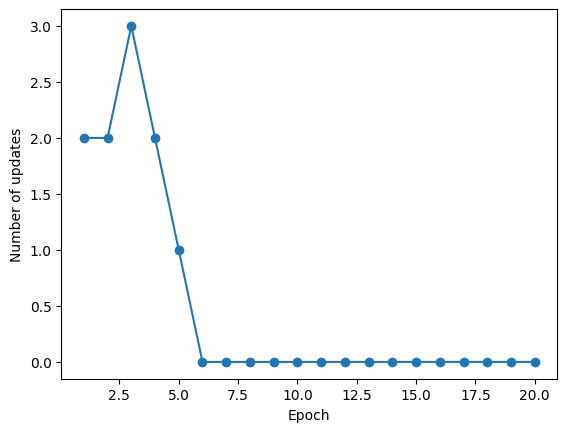

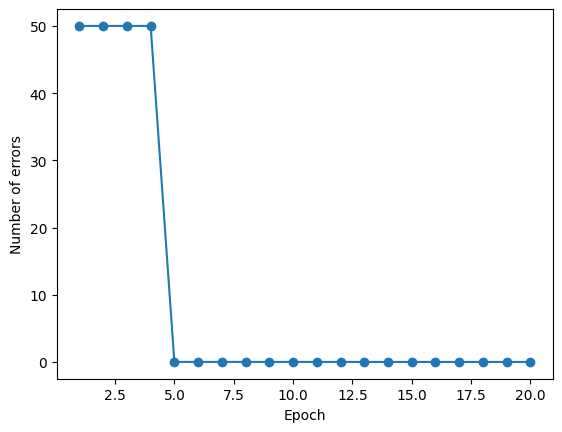

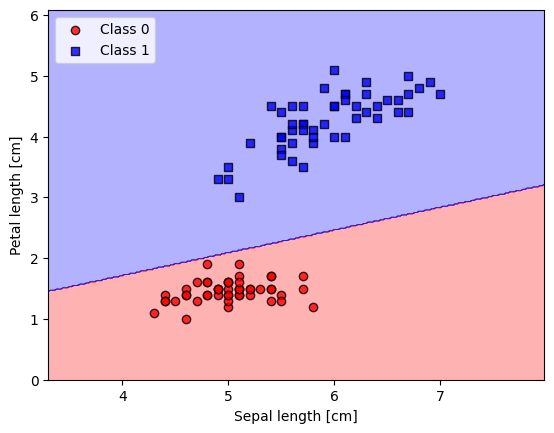

In [ ]:
# Select setosa and versicolor
X = np.concatenate((Xs[0:50,:2],Xs[50:100,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[50:100]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and versicolor data
pn_sv = Perceptron(n_iter=20)
pn_sv.fit(X, y)

# Plot the number of updates
plt.plot(range(1, len(pn_sv.updates_) + 1), pn_sv.updates_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Plot the number of errors
plt.plot(range(1, len(pn_sv.errors_) + 1), pn_sv.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.show()

# Plot the decision regions
plot_decision_regions(X, y, pn_sv)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**Classifying Setosa and Virginica**

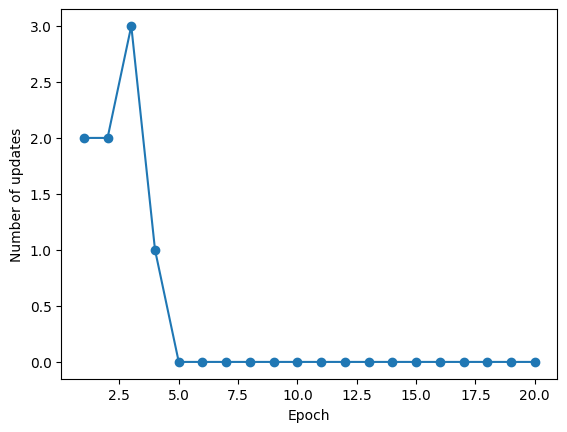

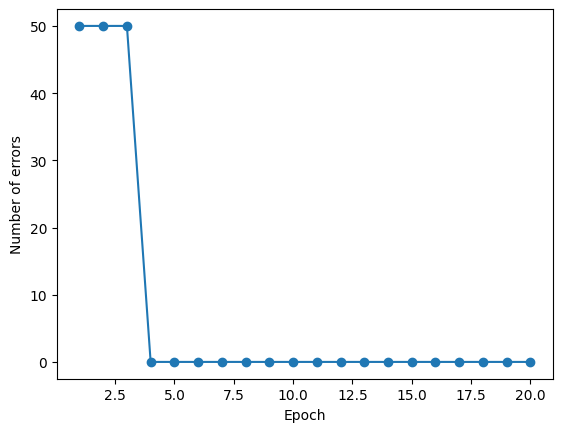

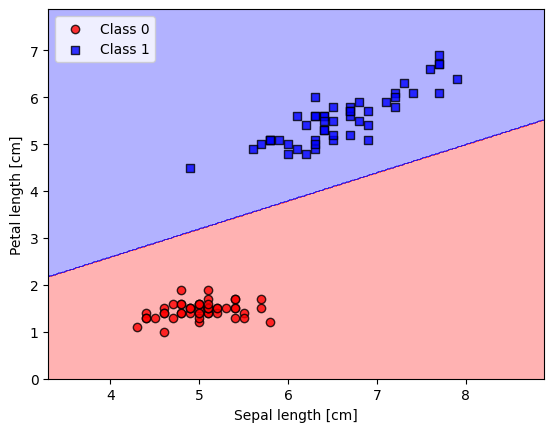

In [ ]:
# Select setosa and Virginica

X = np.concatenate((Xs[0:50,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[100:150]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and Virginica data
pn_sve = Perceptron(n_iter=20)
pn_sve.fit(X, y)

# Plot the number of updates
plt.plot(range(1, len(pn_sve.updates_) + 1), pn_sve.updates_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Plot the number of errors
plt.plot(range(1, len(pn_sve.errors_) + 1), pn_sve.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.show()

# Plot the decision regions
plot_decision_regions(X, y, pn_sve)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

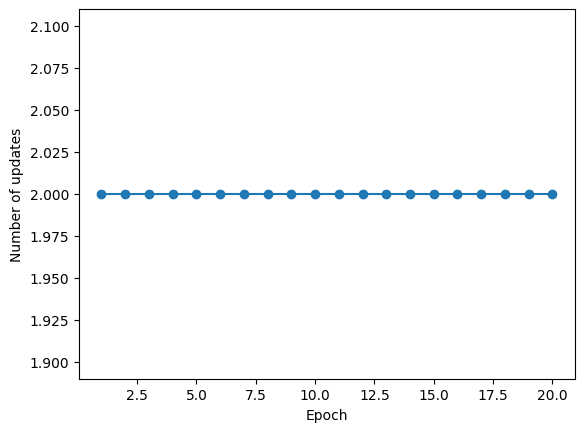

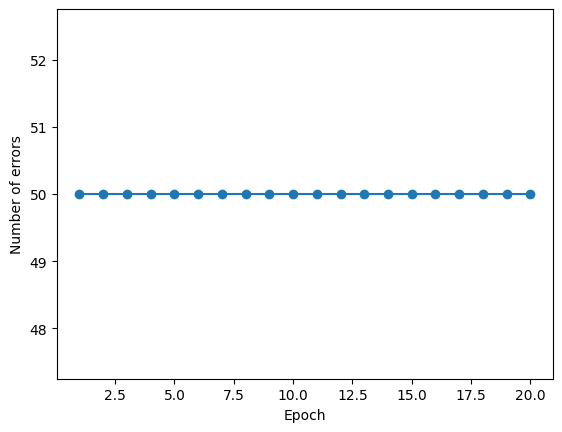

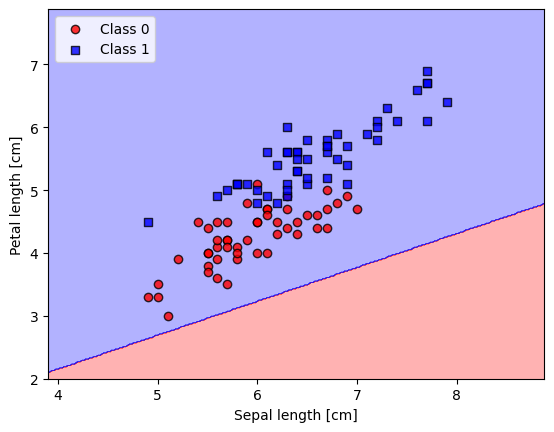

In [ ]:
# Select versicolor and virginica

X = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y = np.where(y == 'Iris-versicolor', 0, 1)

# Train an Adaline using the versicolor and virginica data
pn_vv = Perceptron(n_iter=20)
pn_vv.fit(X, y)

# Plot the number of updates
plt.plot(range(1, len(pn_vv.updates_) + 1), pn_vv.updates_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Plot the number of errors
plt.plot(range(1, len(pn_vv.errors_) + 1), pn_vv.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.show()

# Plot the decision regions
plot_decision_regions(X, y, pn_vv)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**Exercise 2 (10 Points):**
> *Implement the all-pair scheme for classifying all three classes in the Iris dataset. Plot the decision boundary of the final multi-class classifier in the same figure. Calculate the error rate of the multi-class classifier.*



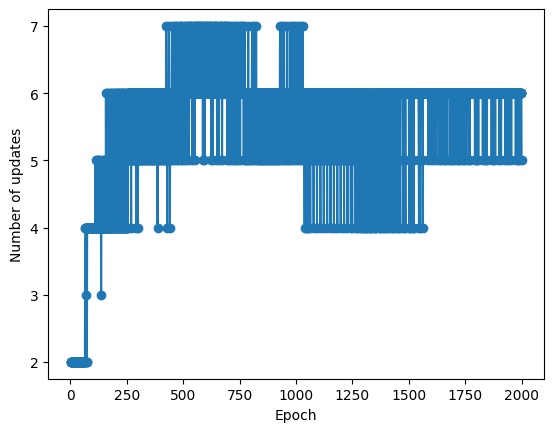

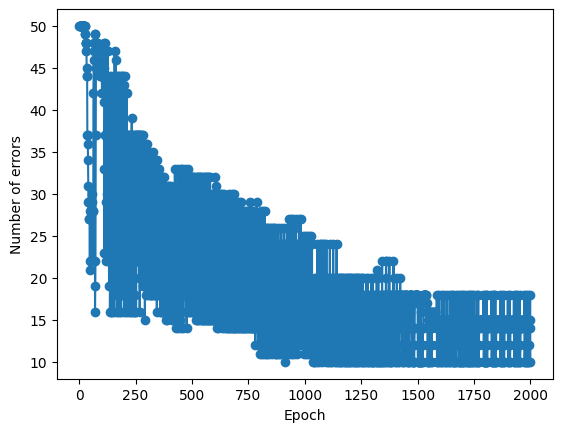

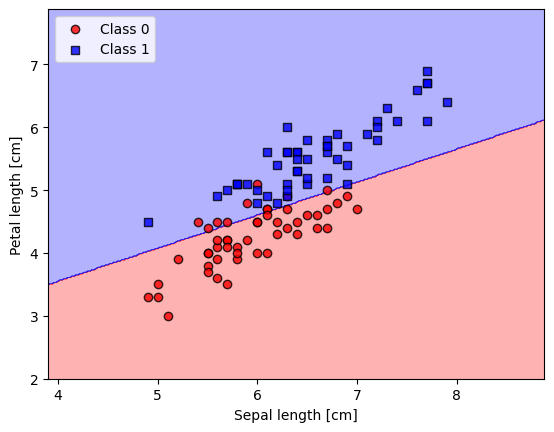

In [ ]:
# Select versicolor and virginica

X = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y = np.where(y == 'Iris-versicolor', 0, 1)

# Train an Adaline using the versicolor and virginica data
pn_vv = Perceptron(n_iter=2000)
pn_vv.fit(X, y)

# Plot the number of updates
plt.plot(range(1, len(pn_vv.updates_) + 1), pn_vv.updates_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Plot the number of errors
plt.plot(range(1, len(pn_vv.errors_) + 1), pn_vv.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.show()

# Plot the decision regions
plot_decision_regions(X, y, pn_vv)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

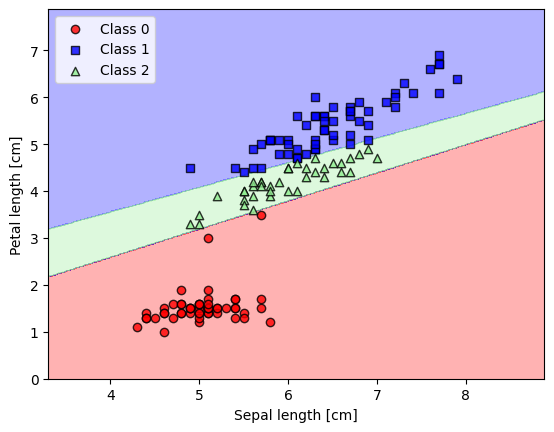

The error rate is: 8.0000 %


In [ ]:
# Select setosa and versicolor
class AllPairsScheme:

    def __init__(self, pn_sv, pn_sve, pn_vv): #the required initiator function
        self.pn_sv = pn_sv #setting all trained models to self
        self.pn_sve = pn_sve
        self.pn_vv = pn_vv

    def predict(self, Xs):
        outTotal = [] # the total array after calculations
        for x_val in Xs: # going thru each value in the Xs of the original dataset
          votes = [0, 0, 0] #vote counters for setosa, virginica, and versicolor
          pn_sv_out = self.pn_sv.predict(x_val) #calling the predict function using each Xs value
          pn_sve_out = self.pn_sve.predict(x_val)
          pn_vv_out = self.pn_vv.predict(x_val)

          votes[0] += abs(pn_sv_out - 1) + abs(pn_sve_out - 1) # used for setosa
          votes[1] += pn_sv_out + pn_vv_out #used for virginica
          votes[2] += pn_sve_out + abs(pn_vv_out - 1) # used for versicolor
          outTotal.append(votes.index(max(votes))) # appending the max number of votes

        return np.array(outTotal) #returning the array
flower = ""
error = 0
ap = AllPairsScheme(pn_sv, pn_sve, pn_vv) #instantiating an object of the class
output = ap.predict(Xs) # calling the predict function on object "ap"

plot_decision_regions(Xs, output, ap) #plotting
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#Error Calculation
for i in range(150): #150 because it is the total number of rows in the original data set
  if(output[i] == 0):
    flower = "Iris-setosa"
  elif(output[i] == 2):
    flower = "Iris-versicolor"
  elif(output[i] == 1):
    flower = "Iris-virginica"
  if(flower != ys[i]): #if none of the current inputs equal the flower, then add to the error
    error += 1
print("The error rate is:" , str('%.4f'%((error/150)*100)), "%") #turning the average error into a percentage then a string